In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [38]:
result = pd.read_csv('avg_sat_results.csv', sep=';')
#result = result.iloc[:60]
result['sat_avg'] = result['sat_avg'] / 100
result.head(10)

,Unnamed: 0,accs,dataset,featurespace_dimension,intrinsic_dimensions,loss,model,sat_avg,thresh
0,0,0.8037,Cifar10,3008,903,0.004974,VGG11,0.303168,0.990
1,1,0.8856,Cifar10,3008,1660,0.003132,VGG11,0.570964,0.999
2,2,0.8861,Cifar10,3008,3008,0.003122,VGG11,1.000000,100.000
3,3,0.8032,Cifar10,1500,636,0.004582,VGG11_S,0.436232,0.990
4,4,0.8571,Cifar10,1500,976,0.003673,VGG11_S,0.682450,0.999
5,5,0.8554,Cifar10,1500,1500,0.003710,VGG11_S,1.000000,100.000
6,6,0.7753,Cifar10,752,395,0.005235,VGG11_XS,0.555555,0.990
7,7,0.8375,Cifar10,752,571,0.003853,VGG11_XS,0.782118,0.999
8,8,0.8384,Cifar10,752,752,0.003863,VGG11_XS,1.000000,100.000
9,9,0.6486,Cifar10,376,243,0.007821,VGG11_XXS,0.666667,0.990


In [39]:
def map_filter_sizes(name):
    if '_' not in name:
        x = 'full #filters'
    elif '_S' in name:
        x = '$\frac{1}{2}$ #filters'
    elif '_XS' in name:
        x = '$\frac{1}{4}$ #filters'
    elif '_XXS' in name:
        x = '$\frac{1}{8}$ #filters'
    elif '_XXXS' in name:
        x = '$\frac{1}{16}$ #filters'
    else:
        x = 'Unknown'
    return x

In [40]:
result['filter_size'] = result['model'].apply(map_filter_sizes)
result.head(25)

,Unnamed: 0,accs,dataset,featurespace_dimension,intrinsic_dimensions,loss,model,sat_avg,thresh,filter_size
0,0,0.8037,Cifar10,3008,903,0.004974,VGG11,0.303168,0.990,full #filters
1,1,0.8856,Cifar10,3008,1660,0.003132,VGG11,0.570964,0.999,full #filters
2,2,0.8861,Cifar10,3008,3008,0.003122,VGG11,1.000000,100.000,full #filters
3,3,0.8032,Cifar10,1500,636,0.004582,VGG11_S,0.436232,0.990,$ rac{1}{2}$ #filters
4,4,0.8571,Cifar10,1500,976,0.003673,VGG11_S,0.682450,0.999,$ rac{1}{2}$ #filters
5,5,0.8554,Cifar10,1500,1500,0.003710,VGG11_S,1.000000,100.000,$ rac{1}{2}$ #filters
6,6,0.7753,Cifar10,752,395,0.005235,VGG11_XS,0.555555,0.990,$ rac{1}{4}$ #filters
7,7,0.8375,Cifar10,752,571,0.003853,VGG11_XS,0.782118,0.999,$ rac{1}{4}$ #filters
8,8,0.8384,Cifar10,752,752,0.003863,VGG11_XS,1.000000,100.000,$ rac{1}{4}$ #filters
9,9,0.6486,Cifar10,376,243,0.007821,VGG11_XXS,0.666667,0.990,$ rac{1}{8}$ #filters


In [41]:
r1  = result[result['thresh'] == 100]
x = np.unique(result['thresh'].values)
t2 = x[0]
print(t2)
r2 = result[result['thresh'] == t2]
r2.head()

0.99


,Unnamed: 0,accs,dataset,featurespace_dimension,intrinsic_dimensions,loss,model,sat_avg,thresh,filter_size
0,0,0.8037,Cifar10,3008,903,0.004974,VGG11,0.303168,0.99,full #filters
3,3,0.8032,Cifar10,1500,636,0.004582,VGG11_S,0.436232,0.99,$ rac{1}{2}$ #filters
6,6,0.7753,Cifar10,752,395,0.005235,VGG11_XS,0.555555,0.99,$ rac{1}{4}$ #filters
9,9,0.6486,Cifar10,376,243,0.007821,VGG11_XXS,0.666667,0.99,$ rac{1}{8}$ #filters
12,12,0.5620,Cifar10,188,135,0.009926,VGG11_XXXS,0.750000,0.99,$ rac{1}{16}$ #filters


In [42]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import scipy
import matplotlib
matplotlib.rc('text', usetex = True)
params = {'backend': 'ps',
#           'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 14, # fontsize for x and y labels (was 10)
          'axes.titlesize': 14,
          'font.size': 10, # was 10
          'legend.fontsize': 10, # was 10
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'font.family': 'serif',
}
matplotlib.rcParams.update(params)
#plt.rcParams["font.family"] = "serif"
#figsize=(4, 2.5)


In [43]:
def log(t,a,b,c):
    return a*np.log(t+c)+b#a*(t)+b+c*(t**2)


def plot(sat, acc, names, filter_sizes, title):
    rsat = 1 - sat
    #b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
    b10, m10, n10 = polyfit(sat, acc, 2)
    params, cov = curve_fit(log, rsat, acc)
    #b2, m2, n2 = polyfit(sat, acc, 2)
    r2 = r2_score(acc, log(rsat, *params))
    print('r2:\t', r2)
    print('chi2:\t', scipy.stats.chisquare(acc, f_exp=log(rsat, *params)))
    
    fig, ax = plt.subplots()#(10,5))

    cmap = plt.get_cmap('viridis')

    network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                             markerfacecolor='black', 
                             markersize=10),
                     Line2D([0], [0], marker='^',  label='VGG13',
                             markerfacecolor='black', 
                             markersize=10),
                     Line2D([0], [0], marker='s', label='VGG16',
                             markerfacecolor='black', 
                             markersize=10),
                     Line2D([0], [0], marker='p', label='VGG19',
                             markerfacecolor='black', 
                             markersize=10),]

    depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                    Line2D([0], [0], color=cmap(0.25), lw=4),
                    Line2D([0], [0], color=cmap(0.5), lw=4),
                    Line2D([0], [0], color=cmap(0.75), lw=4),
                    Line2D([0], [0], color=cmap(1.0), lw=4)]

    x = np.linspace(0, 1, 100)
    #print(x)
    
    
    plt.text(0.6, 0.1,f'$R^2: {round(r2, 3)}$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
            fontsize=16)

    colors = {
        'full #filters': cmap(0.0),
        '$\frac{1}{2}$ #filters' : cmap(0.25),
        '$\frac{1}{4}$ #filters' : cmap(0.5),
        '$\frac{1}{8}$ #filters': cmap(0.75),
        '$\frac{1}{16}$ #filters': cmap(1.0)
    }
    
    def network_depth(model):
        mapper = {
        'VGG11': 'o',
        'VGG13': '^',
        'VGG16': 's',
        'VGG19': 'p'
        }
        for key, val in mapper.items():
            if key in model:
                return val
        return None

    filter_legend = []



    for i in range(len(sat)):
        ax.scatter(x=sat[i], y=acc[i], color=colors[filter_sizes[i]], marker=network_depth(names[i]))
    #plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
    #ax.plot(x, n2*(x**2)+m2*x+b2, c='green')
    ax.plot(x, log(1.0-x, *params), c='grey')

    l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
    ax = plt.gca().add_artist(l1)
    plt.legend(depth_legend, [r'full \#filters', 
                               r'$\frac{1}{2}$ \#filters', 
                               r'$\frac{1}{4}$  \#filters', 
                              r'$\frac{1}{8}$  \#filters',
                              r'$\frac{1}{16}$  \#filters'], loc=3, prop={'size': 11})
    plt.xlim((0,1))
   # plt.ylim((0, 1))

    #for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
    #    plt.annotate(all_names[i], xy)

    #plt.legend(prop={'size': 13})
    plt.grid()




    #plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
    plt.xlabel('$s_{\mu}$', fontsize=16)
    plt.ylabel('Test Accuracy', fontsize=16)

    plt.savefig(
        f"{title}.eps",
        format="eps",
        dpi=1000,
        bbox_inches="tight",
    )
    return x

## CIFAR10, 100 and CatVsDog with all data

r2:	 0.8956589483354369
chi2:	 Power_divergenceResult(statistic=0.05779275251503414, pvalue=1.0)


d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

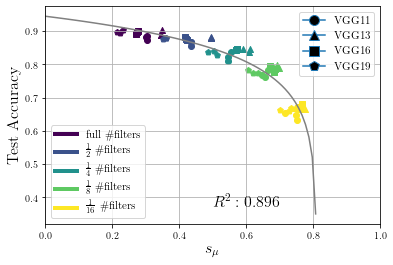

In [44]:
ds = 'Cifar10'
x = plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cifar10_raw')
print(x)

d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


r2:	 0.7107367606752144
chi2:	 Power_divergenceResult(statistic=0.7164528776746794, pvalue=1.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

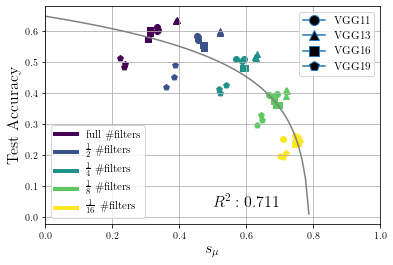

In [45]:
ds = 'Cifar100'
plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cifar100_raw')

d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


r2:	 0.8091950105935145
chi2:	 Power_divergenceResult(statistic=0.02658667887500689, pvalue=1.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

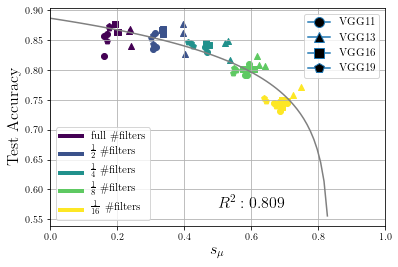

In [46]:
ds = 'CatVsDog'
plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cvd_raw')

## CIFAR10, 100 and CatVsDog with averaged duplicate runs

In [47]:
r1_g = r1.groupby(['thresh', 'model', 'dataset', 'filter_size']).mean().reset_index()
r2_g = r2.groupby(['thresh', 'model', 'dataset', 'filter_size']).mean().reset_index()

r1_g.head(10)

,thresh,model,dataset,filter_size,Unnamed: 0,accs,featurespace_dimension,intrinsic_dimensions,loss,sat_avg
0,100.0,VGG11,CatVsDog,full #filters,422,0.846833,3008,3008,0.003274,1.0
1,100.0,VGG11,Cifar10,full #filters,62,0.881067,3008,3008,0.003290,1.0
2,100.0,VGG11,Cifar100,full #filters,242,0.603933,3008,3008,0.013594,1.0
3,100.0,VGG11_S,CatVsDog,$ rac{1}{2}$ #filters,425,0.845167,1500,1500,0.003114,1.0
4,100.0,VGG11_S,Cifar10,$ rac{1}{2}$ #filters,65,0.863733,1500,1500,0.003456,1.0
5,100.0,VGG11_S,Cifar100,$ rac{1}{2}$ #filters,245,0.577433,1500,1500,0.012978,1.0
6,100.0,VGG11_XS,CatVsDog,$ rac{1}{4}$ #filters,428,0.836833,752,752,0.003077,1.0
7,100.0,VGG11_XS,Cifar10,$ rac{1}{4}$ #filters,68,0.823833,752,752,0.004165,1.0
8,100.0,VGG11_XS,Cifar100,$ rac{1}{4}$ #filters,248,0.506300,752,752,0.014486,1.0
9,100.0,VGG11_XXS,CatVsDog,$ rac{1}{8}$ #filters,431,0.797167,376,376,0.003436,1.0


In [48]:
r1 = r1_g
r2 = r2_g

d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.

r2:	 0.9083268976498882
chi2:	 Power_divergenceResult(statistic=0.0169274182928186, pvalue=1.0)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

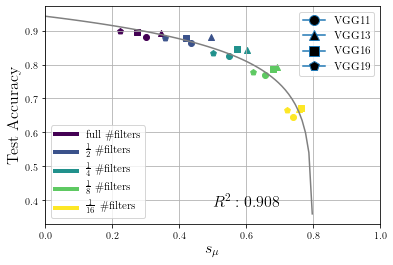

In [49]:
ds = 'Cifar10'
plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cifar10_avg')

d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


r2:	 0.7207687251280537
chi2:	 Power_divergenceResult(statistic=0.23029862762116357, pvalue=0.999999999999999)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

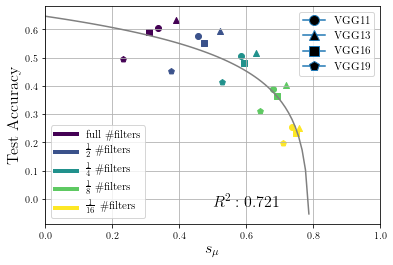

In [50]:
ds = 'Cifar100'
plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cifar100_avg')

d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\delve-deep-dive\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


r2:	 0.8768682159670173
chi2:	 Power_divergenceResult(statistic=0.005476114234861412, pvalue=1.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

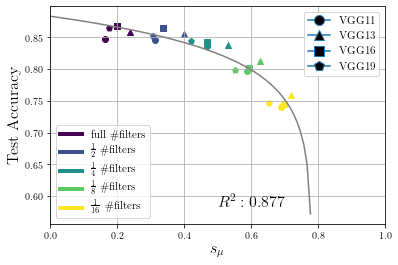

In [51]:
ds = 'CatVsDog'
plot(r2[r2['dataset'] == ds]['sat_avg'].values, r1[r1['dataset'] == ds]['accs'].values, r2[r2['dataset'] == ds]['model'].values, r2[r2['dataset'] == ds]['filter_size'].values, 'avgsat_cvd_avg')